<a href="https://colab.research.google.com/github/abhishek01bv/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/CarPriceprediction.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
pd.set_option('display.max_columns', None)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [9]:
df.drop(['car_ID','symboling'], axis=1, inplace=True )

In [10]:
df1 = df.drop(df.describe(include='O').columns, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


<Axes: >

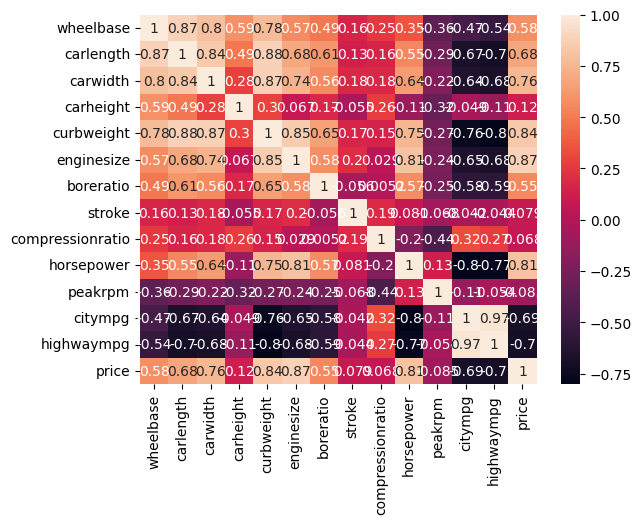

In [11]:
sns.heatmap(df1.corr(), annot=True)

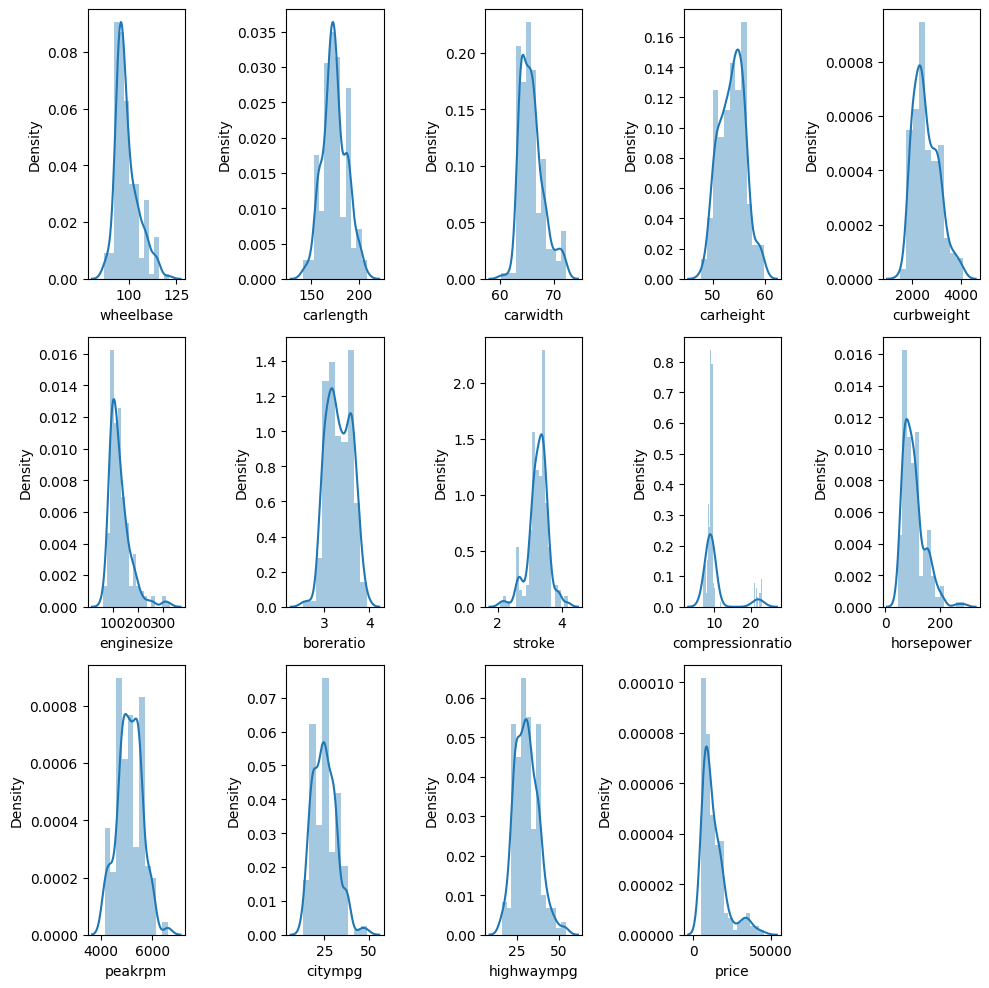

In [12]:
plt.figure(figsize=(10,10))
plotnumber =1

for column in df1.columns:
  plt.subplot(3,5,plotnumber)
  sns.distplot(df1[column])
  plotnumber+=1

plt.tight_layout()

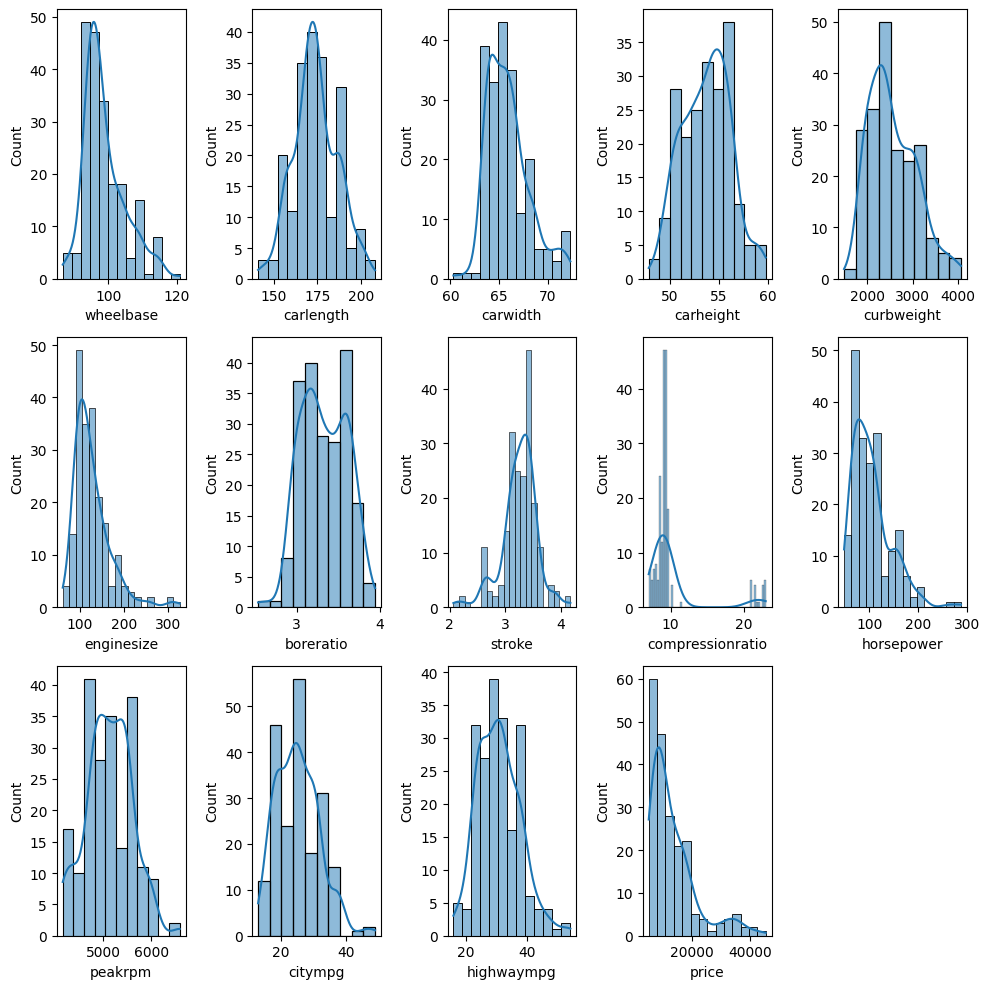

In [13]:
plt.figure(figsize=(10,10))
plotnumber =1

for column in df1.columns:
  plt.subplot(3,5,plotnumber)
  sns.histplot(df1[column], kde=True)
  plotnumber+=1

plt.tight_layout()

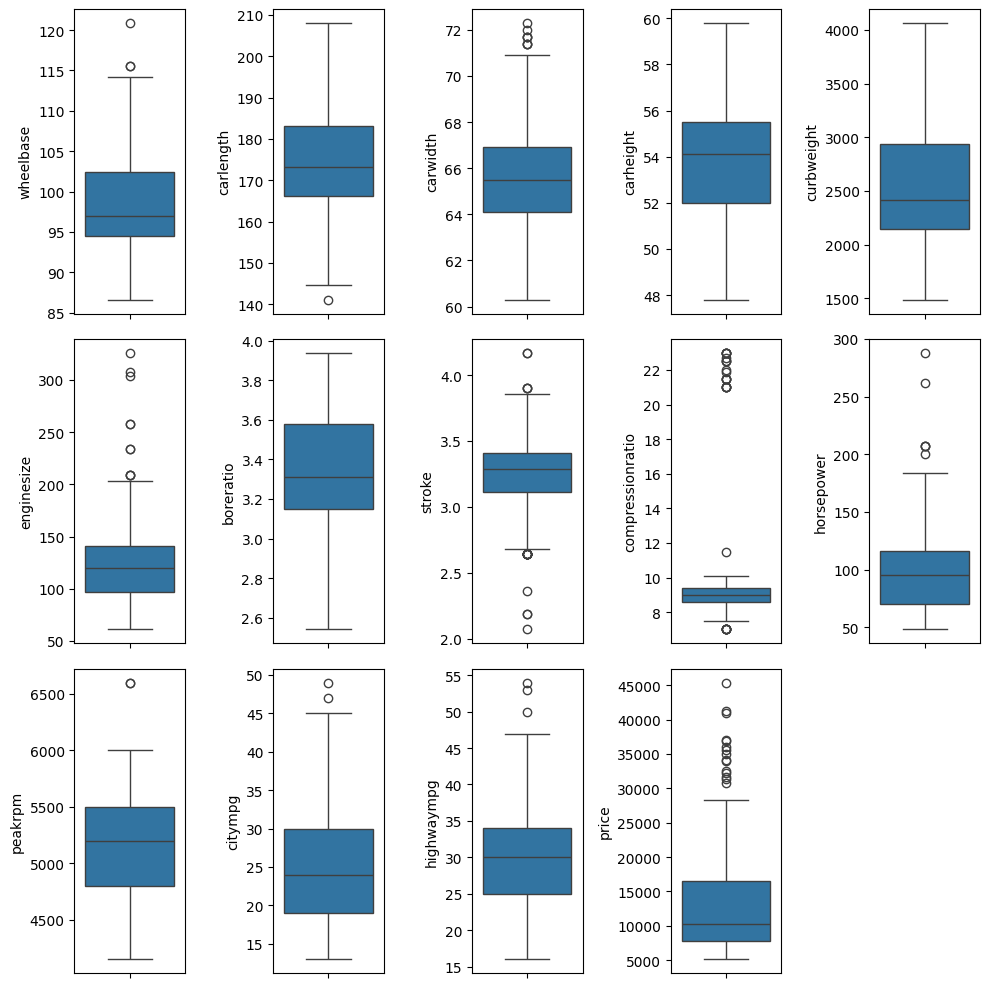

In [14]:
plt.figure(figsize=(10,10))
plotnumber =1

for column in df1.columns:
  plt.subplot(3,5,plotnumber)
  sns.boxplot(df1[column])
  plotnumber+=1

plt.tight_layout()

In [15]:
replace_outliers = df1.copy()
for column in df1.columns:
  q1 = df1[column].quantile(0.25)
  q3 = df1[column].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5*iqr
  upper = q3 +1.5*iqr
  df1.loc[(df1[column]<lower)|(df1[column]>upper)] = df1[column].mean()
  upper = 0
  lower =0

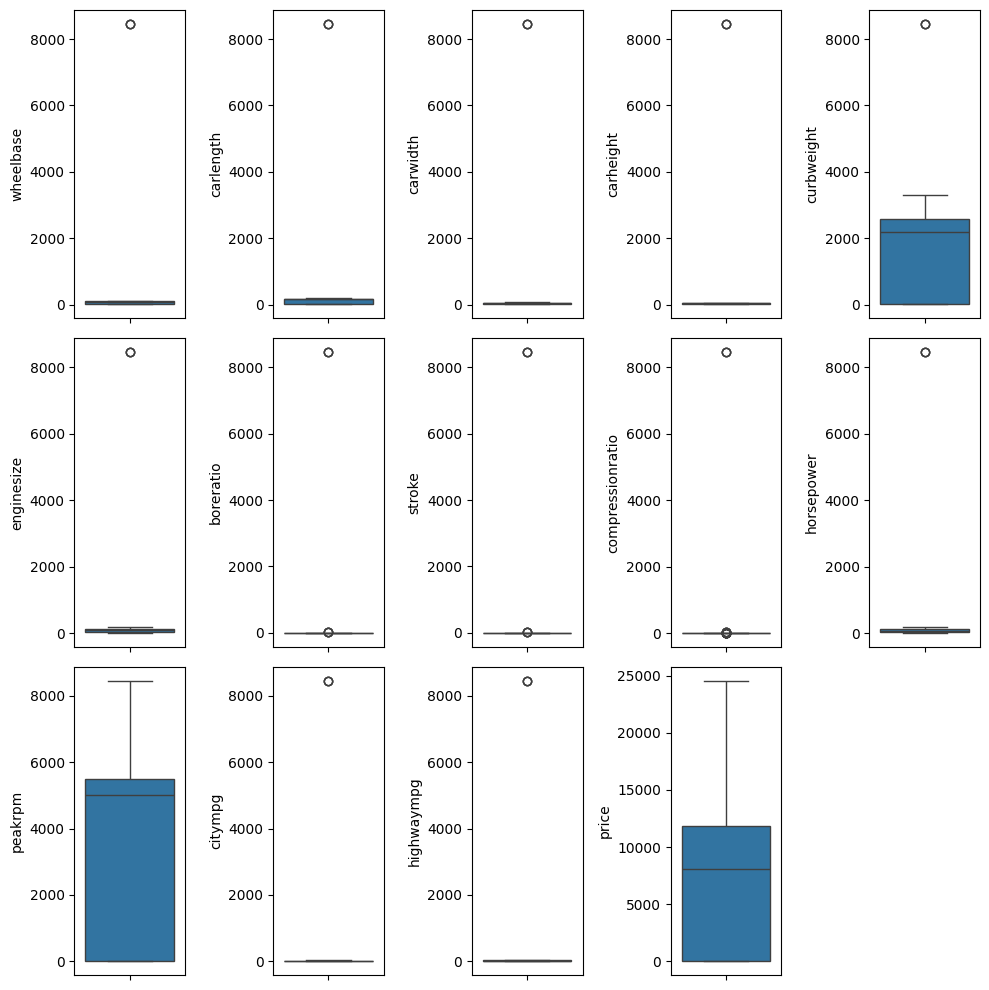

In [16]:
plt.figure(figsize=(10,10))
plotnumber =1

for column in df1.columns:
  plt.subplot(3,5,plotnumber)
  sns.boxplot(df1[column])
  plotnumber+=1

plt.tight_layout()

In [17]:
df.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [18]:
df['aspiration'].value_counts()

,count
aspiration,
std,168
turbo,37


In [19]:
df['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


In [20]:
df['cylindernumber'].value_counts()

,count
cylindernumber,
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


In [21]:
df['enginetype'].value_counts()

,count
enginetype,
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1


In [22]:
df2 = df.drop(df1.columns, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CarName         205 non-null    object
 1   fueltype        205 non-null    object
 2   aspiration      205 non-null    object
 3   doornumber      205 non-null    object
 4   carbody         205 non-null    object
 5   drivewheel      205 non-null    object
 6   enginelocation  205 non-null    object
 7   enginetype      205 non-null    object
 8   cylindernumber  205 non-null    object
 9   fuelsystem      205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df2['CarName']= le.fit_transform(df2[['CarName']])
df2['fueltype']= le.fit_transform(df2[['fueltype']])
df2['aspiration']= le.fit_transform(df2[['aspiration']])
df2['carbody']=le.fit_transform(df2[['carbody']])
df2['drivewheel']=le.fit_transform(df2[['drivewheel']])
df2['enginelocation']=le.fit_transform(df2[['enginelocation']])
df2['enginetype']=le.fit_transform(df2[['enginetype']])
df2['cylindernumber']=le.fit_transform(df2[['cylindernumber']])
df2['fuelsystem']=le.fit_transform(df2[['fuelsystem']])


In [26]:
df2.drop('doornumber',axis=1,inplace = True)

In [27]:
final_df = pd.concat([df2,df1],axis=1)

In [28]:
final_df

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,0,2,0,0,2,5,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686
1,3,1,0,0,2,0,0,2,5,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686
2,1,1,0,2,2,0,5,3,5,94.500000,171.200000,65.500000,52.400000,2823.000000,152.000000,2.680000,3.470000,9.000000,154.000000,5000.000000,19.000000,26.000000,16500.000000
3,4,1,0,3,1,0,3,2,5,99.800000,176.600000,66.200000,54.300000,2337.000000,109.000000,3.190000,3.400000,10.000000,102.000000,5500.000000,24.000000,30.000000,13950.000000
4,5,1,0,3,0,0,3,1,5,99.400000,176.600000,66.400000,54.300000,2824.000000,136.000000,3.190000,3.400000,8.000000,115.000000,5500.000000,18.000000,22.000000,17450.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,3,2,0,3,2,5,109.100000,188.800000,68.900000,55.500000,2952.000000,141.000000,3.780000,3.150000,9.500000,114.000000,5400.000000,23.000000,28.000000,16845.000000
201,138,1,1,3,2,0,3,2,5,109.100000,188.800000,68.800000,55.500000,3049.000000,141.000000,3.780000,3.150000,8.700000,160.000000,5300.000000,19.000000,25.000000,19045.000000
202,140,1,0,3,2,0,5,3,5,109.100000,188.800000,68.900000,55.500000,3012.000000,173.000000,3.580000,2.870000,8.800000,134.000000,5500.000000,18.000000,23.000000,21485.000000
203,142,0,1,3,2,0,3,3,3,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686,9.438686


In [29]:
X = final_df.drop('price', axis=1)

In [30]:
y = final_df['price']

In [31]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)


In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
re = RandomForestRegressor()

In [42]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(X_test_scaled)

In [44]:
print(r2_score(y_test, y_pred))

0.9221013994424168


In [45]:
re.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [46]:
y_pred = re.predict(X_test_scaled)

In [47]:
print(r2_score(y_test, y_pred))

0.9171309488418498


In [51]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [52]:
y_pred = dt.predict(X_test_scaled)

In [53]:
print(r2_score(y_test, y_pred))

0.7631792338590468
